In [1]:
newtonraphson <- function(ftn, x0 , tol = 1e-9, max.iter = 5000) {
    x <- x0 
    fx <- ftn(x)     
    iter <- 0
    while ((abs(fx[1]) > tol) & (iter < max.iter)) {
        x <- x - fx[1]/fx[2]
        fx <- ftn(x)
        iter <- iter + 1
        }
    if (abs(fx[1]) > tol) {
    cat("Algorithm failed to converge\n")
    return(NULL)
    } else {  # abs(fx[1]) <= tol
    #cat("Algorithm converged\n")
    return(x)
    }
}


In [2]:
ftn_upper <- function(p){
    fx <- (-0.975)
    dfx <- 0
    for (k in 4:20){
        fx <- fx+choose(20,k)*(p^k)*((1-p)^(20-k))
        dfx <- dfx+choose(20,k)*k*(p^(k-1))*((1-p)^(20-k)) - (p^k)*(20-k)*((1-p)^(19-k))
    }
    return(c(fx,dfx))
}

ftn_lower <- function(p){
    fx <- (-0.025)
    dfx <- 0
    for (k in 3:20){
        fx <- fx+choose(20,k)*(p^k)*((1-p)^(20-k))
        dfx <- dfx+choose(20,k)*k*(p^(k-1))*((1-p)^(20-k)) - (p^k)*(20-k)*((1-p)^(19-k))
    }
    return(c(fx,dfx))
}


1. Please use the Newton-Raphson method to calculate exact C.I., but you don’t need to present your plots when deciding initial values. 

In [3]:
cat("exact 95% C.I: ",newtonraphson(ftn_lower,0.1),newtonraphson(ftn_upper,0.1))

exact 95% C.I:  0.03207094 0.3789268

---

 2. Coverage and length of 95% asymptotic confidence intervals  

In [8]:
data <- c()
low95 <- c()
upper95 <- c()
for (i in 1:1000){
    set.seed(i)
    data[i] <- (rbinom(1,size = 20,prob = 0.15))/20
    low95[i] <- data[i]-qnorm(0.975)*sqrt(0.15*(1-0.15)/20)
    upper95[i] <- data[i]+qnorm(0.975)*sqrt(0.15*(1-0.15)/20)
}
low95 <- ifelse(low95<=0,0,low95)

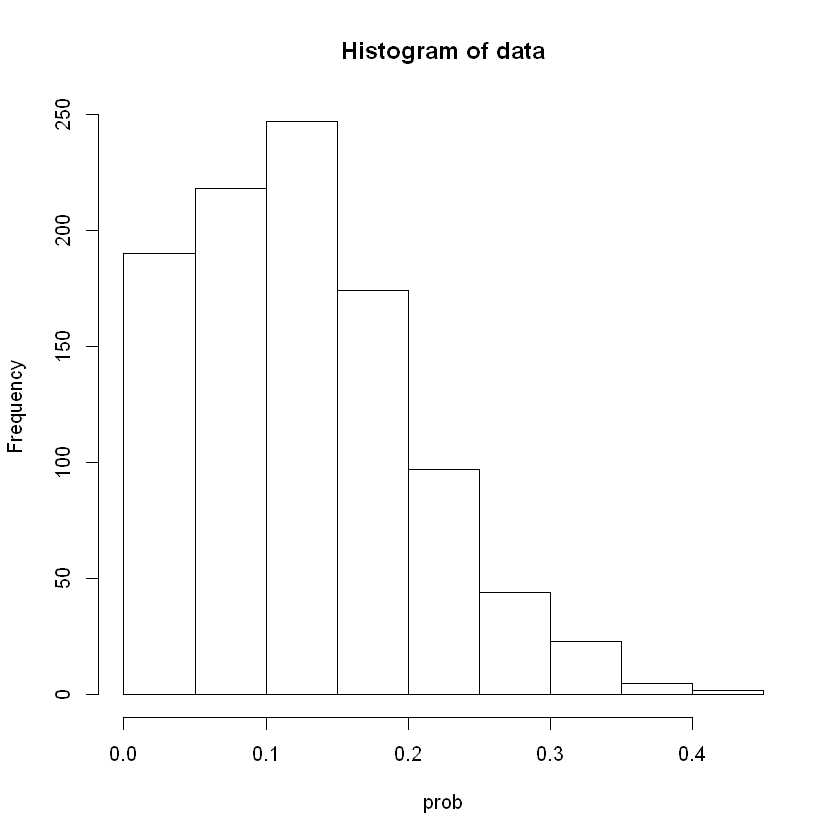

In [9]:
hist(data,xlab="prob")

In [10]:
cat("length of 95% asymptotic confidence intervals: ",mean(upper95)-mean(low95))

length of 95% asymptotic confidence intervals:  0.2769798

In [11]:
cat("asymptotic 95% C.I: ",mean(low95),mean(upper95))

asymptotic 95% C.I:  0.02921075 0.3061906